In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [7]:

batch_size = 64

train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)
# train은 shuffle 시키지만, train 같은 경우에는 순서를 섞으면 안된다 (제출시 순서가 달라진다..)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size= 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size= 5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)
        x = self.fc(x)
        return F.log_softmax(x)
        

In [9]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [10]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [11]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [12]:
for epoch in range(1, 10):
    train(epoch)
    test()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306626
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.303928
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.278823
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.282605
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.266898
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.242867
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.211756
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.206853
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.169533
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.097915
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.995958
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.855780
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.651342
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.431540
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.272862
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.901396
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.901829
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.826418
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.729059
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.473085
Train Epoch: 1 [12800/60000 (

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
D:\anaconda\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1718, Accuracy: 9464/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.096682
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.166386
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.144799
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.320572
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.331182
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.280766
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.153434
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.112982
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.310260
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.401081
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.075263
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.204310
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.141377
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.100483
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.057386
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.152957
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.140898
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.125793
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.121200
Train Epoch: 2 [12

Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.098119
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.124464
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.107602
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.116112
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.069904
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.194363
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.198570
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.087291
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.065217
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.060597
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.039096
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.041659
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.111281
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.065979
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.077283
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.112848
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.032795
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.062716
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.064737
Train Epoch: 3 [56960/60000 (95%)]	Loss: 0.199295


Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.091727
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.095787
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.155595
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.083446
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.051956
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.139504
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.087111
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.068953
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.150608
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.080833
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.042134
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.092360
Train Epoch: 5 [37120/60000 (62%)]	Loss: 0.110857
Train Epoch: 5 [37760/60000 (63%)]	Loss: 0.135556
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.107395
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.097239
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.087989
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.035549
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.046871
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.122369


Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.039660
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.020191
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.026358
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.025785
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.072562
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.028217
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.010391
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.112326
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.032734
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.079551
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.045598
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.027864
Train Epoch: 7 [21760/60000 (36%)]	Loss: 0.102000
Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.040140
Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.212303
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.036918
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.032887
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.042110
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.050915
Train Epoch: 7 [26240/60000 (44%)]	Loss: 0.048131


Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.022536

Test set: Average loss: 0.0536, Accuracy: 9818/10000 (98%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.076133
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.037174
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.072825
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.054483
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.021301
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.204548
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.033760
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.029552
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.037262
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.106450
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.042886
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.011611
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.027710
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.106879
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.029436
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.026410
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.065875
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.138578
Train Epoch: 9 [11

In [21]:
class revised_Net(nn.Module):
    def __init__(self):
        super(revised_Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1,32, kernel_size= 3)
        self.mp1 = nn.MaxPool2d(kernel_size= 2, stride= 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size= 3)
        self.mp2 = nn.MaxPool2d(kernel_size= 2, stride= 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size= 3)
        self.mp3 = nn.MaxPool2d(kernel_size= 2, stride=2, padding= 1)     
        
        
        self.fc1 =  nn.Linear(512, 100)
        self.fc2 = nn.Linear(100, 10)
        

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp1(self.conv1(x)))
        x = F.relu(self.mp2(self.conv2(x)))        
        x = F.relu(self.mp3(self.conv3(x)))        
        x = x.view(in_size, -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)        

In [22]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [24]:
for epoch in range(1, 10):
    train(epoch)
    test()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.244275
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.234979
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.222257
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.198083
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.175370
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.140400
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.127684
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.069557
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.012579
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.915854
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.749854
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.722522
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.511045
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.442582
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.383101
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.023172
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.096320
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.053038
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.672551
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.724739
Train Epoch: 1 [12800/60000 (

D:\anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
D:\anaconda\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2251, Accuracy: 9264/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.342657
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.162373
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.197748
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.098347
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.239635
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.309634
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.108843
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.295676
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.078862
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.154018
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.146602
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.154329
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.041335
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.076588
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.343505
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.119384
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.138425
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.137929
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.186986
Train Epoch: 2 [12

Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.027006
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.098638
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.147508
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.045071
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.210916
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.044212
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.224100
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.127673
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.050612
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.108079
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.023761
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.200204
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.103162
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.072352
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.090437
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.075177
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.055562
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.200061
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.163249
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.172443


Train Epoch: 5 [28160/60000 (47%)]	Loss: 0.148892
Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.034335
Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.019680
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.082171
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.049766
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.143134
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.029582
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.054435
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.027724
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.019143
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.058620
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.188941
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.045014
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.029784
Train Epoch: 5 [37120/60000 (62%)]	Loss: 0.158745
Train Epoch: 5 [37760/60000 (63%)]	Loss: 0.024144
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.121051
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.180576
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.095912
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.080568


Train Epoch: 7 [12160/60000 (20%)]	Loss: 0.035610
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.035691
Train Epoch: 7 [13440/60000 (22%)]	Loss: 0.109153
Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.013350
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.040563
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.015366
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.054120
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.214601
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.046331
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.016763
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.040343
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.057469
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.041257
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.144133
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.027245
Train Epoch: 7 [21760/60000 (36%)]	Loss: 0.019127
Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.036861
Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.038342
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.006615
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.105437


Train Epoch: 8 [56960/60000 (95%)]	Loss: 0.013225
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.059823
Train Epoch: 8 [58240/60000 (97%)]	Loss: 0.056601
Train Epoch: 8 [58880/60000 (98%)]	Loss: 0.049404
Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.021600

Test set: Average loss: 0.0437, Accuracy: 9854/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.057104
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.046018
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.052060
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.059099
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.240665
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.028371
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.013857
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.089101
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.049385
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.031529
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.084170
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.068864
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.026630
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.046451
Train Epoch: 9 [

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#랜덤 시드 고정 : 학습을 위한 실험을 할 때 무작위성을 컨트롤하기 위해 사용한다. 
torch.manual_seed(777) #cpu 연산 고정

if device == "cuda:0":
    torch.cuda.manual_seed_all(777) # 멀티 gpu 연산 무작위 고정 

import time
import copy

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

In [6]:
device

device(type='cpu')

In [26]:
# Data Augmentation, Transform의 기능은?
    # 사진 데이터의 양을 늘려줌 이 경우, 

transform = transforms.Compose([
                                transforms.Resize(256),  # 사진 데이터의 크기를 재조정
                                transforms.RandomCrop(227), #227 * 227 , 사진 데이터의 일부만 뽑아냄 (중앙 기준)
                                transforms.ToTensor(), # Tensor로 변환
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # R,G,B를 평균이 0.5, 표준편차가 0.5이도록 Normalize
])

In [28]:
batch_size = 64 #batch_size는 원하는 크기로 변경 가능. 

cifar_train = datasets.CIFAR10('~/.data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)                                                                                            

cifar_test = datasets.CIFAR10('~/.data', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

data_loaders = {'train' : train_loader, 'val': test_loader}
total_batch = {'train' : len(train_loader), 'val': len(test_loader)}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


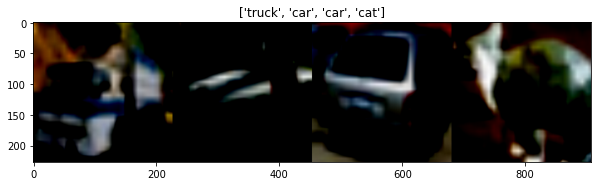

In [29]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

dataiter       = iter(train_loader)   # iter함수로 iteration 객체 가져오기
images, labels = next(dataiter)   # next함수로 다음 배치 1개 갖고오기

img  = utils.make_grid(images[:4], padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.title([classes[label] for label in labels[:4].tolist()])
plt.show()

In [36]:
test_loader.dataset.data[0].shape

(32, 32, 3)

In [45]:
class cifar_Net(nn.Module):
    def __init__(self):
        super(cifar_Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size= 3)
        self.mp1 = nn.MaxPool2d(kernel_size= 2, stride= 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size= 3)
        self.mp2 = nn.MaxPool2d(kernel_size= 2, stride= 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size= 3)
        self.mp3 = nn.MaxPool2d(kernel_size= 2, stride=2, padding= 1)     
        
        
        self.fc1 =  nn.Linear(93312, 100)
        self.fc2 = nn.Linear(100, 10)
        

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp1(self.conv1(x)))
        x = F.relu(self.mp2(self.conv2(x)))        
        x = F.relu(self.mp3(self.conv3(x)))        
        x = x.view(in_size, -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)        

In [46]:
model = cifar_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data).to(device), Variable(target).to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True).to(device), Variable(target).to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
     

In [47]:
for epoch in range(1, 10):
    train(epoch)
    test()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303298
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.294064


KeyboardInterrupt: 